# Practica 08

### Realizado por: Luis Abdiel Rivera Gayosso

## Paso 1: Importación de bibliotecas y configuración inicial

In [1]:
%%time

# Installing select libraries:-
from gc import collect; # garbage collection to free up memory
from warnings import filterwarnings; # handle warning messages

import re # regular expressions

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats # statistical functions

from itertools import cycle, combinations  # Igenerating combinations & cycle

import matplotlib.pyplot as plt # data visualization
from matplotlib.ticker import FuncFormatter  # For custom formatting of ticks
from matplotlib.ticker import FormatStrFormatter  # For formatting ticks with a string
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D axes module
from matplotlib.colors import ListedColormap  # Importing colormap for scatter plot
import seaborn as sns # statistical data visualization
from wordcloud import WordCloud  # Importing WordCloud library for textual data visualization

from io import StringIO

filterwarnings('ignore'); # Ignore warning messages
from IPython.display import display, HTML, display_html, clear_output; # displaying HTML content


clear_output();
print();
collect();


CPU times: total: 3.16 s
Wall time: 4.09 s


In [2]:
# Set the plot style to 'fivethirtyeight'
class color:
    GRAY = '\033[90m'
    LIGHT_BLUE = '\033[94m'
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    BOLD = '\033[1m'
    RED = '\033[91m'
    END = '\033[0m'
    UNDERLINE = '\033[4m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    MAGENTA = '\033[95m'
    WHITE = '\033[97m'
    BLACK = '\033[30m'
    LIGHT_RED = '\033[91m'
    LIGHT_GREEN = '\033[92m'
    LIGHT_YELLOW = '\033[93m'
    LIGHT_BLUE = '\033[94m'
    LIGHT_MAGENTA = '\033[95m'
    LIGHT_CYAN = '\033[96m'
    LIGHT_WHITE = '\033[97m'
    RESET = '\033[0m'

# Define global styling properties
global_style = {
    "background-color": "#ff4d4d",
    "color": "#e6e6ff",
    "border": "1.5px solid black",
    "font-weight": "bold"
}

plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize":(10, 10)})
print(f"{color.GREEN}Succesfully Configured libraries!{color.END}")

Succesfully Configured libraries!


## Paso 2 Lectura de archivo CSV

In [3]:
%%time

# Error Handling When Loading Dataset with Pandas read_csv

try:
    # Attempt to read the dataset
    df = pd.read_csv('salaries.csv')
    print(f"{color.GREEN}Dataset loaded successfully.{color.END}")
    
except FileNotFoundError:
    # Handle FileNotFoundError if the file does not exist
    print(f"{color.RED}Error: File not found. Please check the file path.{color.END}")

except Exception as e:
    # Handle other exceptions
    print(f"{color.RED}An error occurred while loading the dataset: {e}{color.END}")

print(color.BLUE)
collect();

Dataset loaded successfully.

CPU times: total: 328 ms
Wall time: 346 ms


## Paso 3 DataFrame

In [4]:
def display_dataframe_with_custom_header(df, show_head=False):
    from IPython.display import display, HTML
    from io import StringIO
    import pandas as pd

    # Define global styling properties
    global_style = {
        "background-color": "#2e3440",
        "color": "#FFFF00",
        "border": "1.5px solid black",
        "font-weight": "bold",
        "font-family": "'Courier New', Courier, monospace"
    }

    # Encabezado sin animaciones, pero manteniendo colores y fuente elegante
    header_text = """
    <h2 style='color: #FF5733; font-weight: bold; font-family: "Poetsen One", sans-serif;
                margin-bottom: 10px;'>
        D<span style="color: #FFFF00;">A</span>T<span style="color: #FFFF00;">A</span>FRAME 
        {frame_type} 
    </h2><br>
    """

    frame_type = "HEAD" if show_head else "INFORMATION"
    header_text = header_text.format(frame_type=frame_type)

    if show_head:
        df_to_display = df.head()
        df_html = df_to_display.to_html(index=False, classes='styled-table', header=True)

        styled_df = f'''
        <style>
        .styled-table {{
            border-collapse: collapse;
            margin: 25px 0;
            font-size: 0.95em;
            font-family: 'Courier New', Courier, monospace;
            min-width: 400px;
            background-color: #2e3440;
            color: #FFFF00;
            border-radius: 8px;
            overflow: hidden;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.3);
        }}
        .styled-table thead th {{
            padding: 12px 15px;
            background-color: #3b4252;
            color: #81a1c1;
            border: 1px solid #444;
            text-align: left;
        }}
        .styled-table tbody td {{
            padding: 12px 15px;
            border: 1px solid #444;
        }}
        </style>
        {header_text}
        {df_html}
        '''
    else:
        info_output = StringIO()
        with pd.option_context('display.max_info_rows', 1000, 'display.max_info_columns', 1000):
            df.info(buf=info_output)

        info_string = info_output.getvalue()

        styled_df = f'''
        {header_text}
        <pre style="{";".join([f"{key}: {value}" for key, value in global_style.items()])};
             padding: 15px; border-radius: 8px;">
        {info_string}
        </pre>
        '''

    google_fonts_link = "<link href='https://fonts.googleapis.com/css2?family=Poetsen+One&display=swap' rel='stylesheet'>"

    html_content = f'''
    <!DOCTYPE html>
    <html>
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Dataframe Information</title>
        {google_fonts_link}
    </head>
    <body style="background-color: #2e3440; color: #FFFF00;">
        {styled_df}
    </body>
    </html>
    '''

    display(HTML(html_content))

In [5]:
display_dataframe_with_custom_header(df)  # Display info
display_dataframe_with_custom_header(df, show_head=True)

work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0,US,M
2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0,US,M
2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0,US,M
2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0,US,M
2025.0,SE,FT,Engineer,143000.0,USD,143000.0,US,0,US,M


## Paso 4 Conteo de Valores Faltantes

In [6]:
def plot_missing_values_heatmap(df):
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Calcular la suma de valores nulos (excluyendo la primera columna)
    missing_values_sum = df.isna().iloc[:, 1:].sum()

    # Cambiar la paleta de colores
    custom_palette = sns.color_palette("coolwarm", as_cmap=True)  # Azul a rojo

    # Crear el heatmap
    plt.figure(figsize=(22, 4), facecolor='silver')
    ax = sns.heatmap(
        missing_values_sum.to_frame(name='').T.rename(columns=lambda x: x.replace('_', ' ').title()), 
        cmap=custom_palette, annot=True, fmt='0.0f',
        annot_kws={"fontsize":30, "fontweight": "bold"},
        linecolor='black', linewidth=2
    )

    # Título
    plt.title(
        'Count of Missing Values', 
        pad=20, fontsize=18, color='#FF5733', 
        fontname='Calibri', fontweight='bold'
    )

    # Ajustar etiquetas del eje X
    ax.set_xticklabels(
        ax.get_xticklabels(), rotation=45, 
        ha='right', fontsize=15, fontweight='bold'
    )

    # Ajustar etiquetas del eje Y
    ax.set_yticklabels(
        ax.get_yticklabels(), fontsize=15, fontweight='bold'
    )

    plt.show()


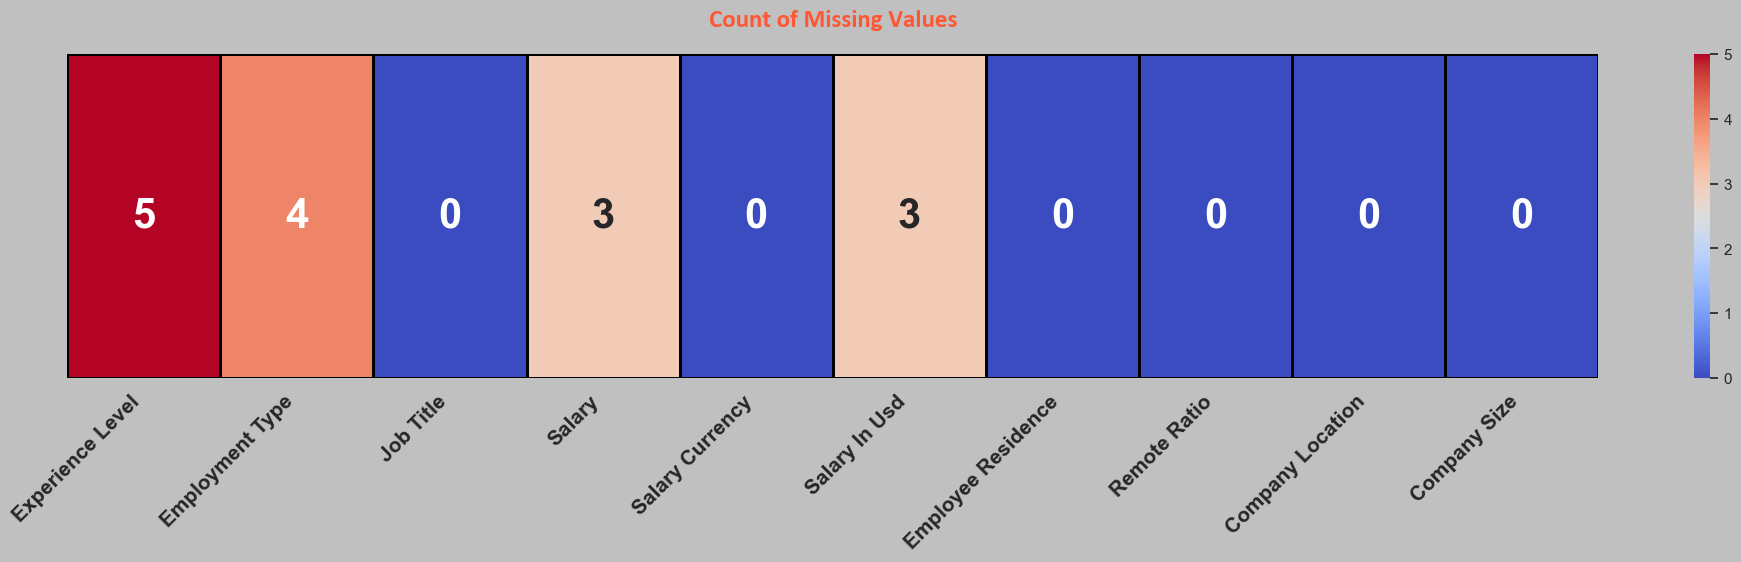

In [7]:
plot_missing_values_heatmap(df)

## Paso 5 Eliminación de valores duplicados

In [8]:
# Checking the duplicate values in the data
duplicate_values = df.duplicated().sum()
print(color.BLUE + f'The data contains {color.BOLD + color.RED}{duplicate_values}{color.END} {color.BLUE}duplicate values')

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

The data contains 39124 duplicate values


In [11]:
def apply_duplicated_styling(df):
    
    # Define a function to apply font size and color to values
    def apply_style(value):
        if value:
            return 'font-size: 10px; color: red'
        else:
            return 'font-size: 10px; color: green'

    # Define a function to apply font size to column names
    def apply_column_name_style(value):
        return 'font-size: 10px'

    # Transpose the DataFrame and check for duplicated values along the rows
    column_duplicates = df.T.duplicated()

    # Apply styling to the DataFrame containing duplicated values
    styled_column_duplicates = column_duplicates.to_frame().style.applymap(apply_style).background_gradient(axis=0)

    # Apply styling to the column names
    styled_column_duplicates.set_table_styles([{'selector': 'th', 'props': [('font-size', '10px')]}])

    return styled_column_duplicates

In [12]:
styled_df = apply_duplicated_styling(df)
styled_df

,0
work_year,False
experience_level,False
employment_type,False
job_title,False
salary,False
salary_currency,False
salary_in_usd,False
employee_residence,False
remote_ratio,False
company_location,False


## Paso 6

In [16]:
def calculate_statistics(df, opacity=0.5, font_size='17px'):
    # Filter numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    stat = pd.DataFrame()  # Initialize an empty dataframe

    # Measure of central tendency
    stat['Mean'] = numeric_df.mean()  # for mean of all columns
    stat['Median'] = numeric_df.median()  # for median of all columns
    stat['Mode'] = numeric_df.mode().iloc[0]  # for mode of all columns

    # Measure of dispersion
    stat['Range'] = (numeric_df.max() - numeric_df.min())
    stat['Stdev'] = numeric_df.std()
    stat['Variance'] = numeric_df.var()

    # Interquartile range
    stat['IQR'] = [stats.iqr(numeric_df[i]) for i in numeric_df.columns]

    # Quantiles
    stat['25%'] = numeric_df.quantile(q=0.25, axis=0)
    stat['50%'] = numeric_df.quantile(q=0.50, axis=0)
    stat['75%'] = numeric_df.quantile(q=0.75, axis=0)

    # Minimum and maximum
    stat['Min'] = numeric_df.min()
    stat['Max'] = numeric_df.max()

    # Skewness and Kurtosis
    stat['Skewness'] = numeric_df.skew()
    stat['Kurtosis'] = numeric_df.kurt()

    # Transpose the DataFrame
    stat = stat.T

    # Apply the float format
    stat = stat.applymap('{:,.2f}'.format)

    # Apply the background color with transparency
    styled_df = stat.style.apply(lambda x: [f'background: rgba(173, 216, 230, {opacity})' for val in x], axis=1)
    
    # Apply font size
    styled_df = styled_df.set_properties(**{'font-size': font_size})
    
    return styled_df

In [17]:
# Example usage:
# Assuming you have a DataFrame called 'df' and want to set transparency to 0.5
stats_df = calculate_statistics(df, opacity=0.4, font_size='19px')
stats_df

,work_year,salary,salary_in_usd,remote_ratio
Mean,"2,023.83","162,550.46","158,011.75",21.58
Median,"2,024.00","148,000.00","147,500.00",0.00
Mode,"2,024.00","160,000.00","160,000.00",0.00
Range,5.00,"30,386,000.00","785,000.00",100.00
Stdev,0.48,"192,567.23","72,498.34",41.02
Variance,0.23,"37,082,139,649.13","5,256,009,910.04","1,682.72"
IQR,nan,nan,nan,0.00
25%,"2,024.00","106,960.00","106,895.00",0.00
50%,"2,024.00","148,000.00","147,500.00",0.00
75%,"2,024.00","200,000.00","199,700.00",0.00


In [21]:
def variable_summary(df, opacity=0.5, font_size='20px'):
    # Initialize an empty list to store individual summaries
    summaries = []

    # Iterate through each column in the DataFrame
    for col in df.columns:
        dtype = df[col].dtype  # Data type of the column
        count = df[col].count()  # Count of non-null values
        unique = df[col].nunique()  # Number of unique values
        missing = df[col].isna().sum()  # Number of missing values

        # Append the summary information to the list
        summaries.append([col, dtype, count, unique, missing])

    # Create a DataFrame from the list of summaries
    summary_df = pd.DataFrame(summaries, columns=['Variable', 'Dtype', 'Count', 'Unique', 'Missing'])

    # Apply background color with opacity
    styled_summary_df = summary_df.style.apply(lambda x: [f'background: rgba(42, 46, 120, {opacity})' for val in x], axis=1)

    # Apply font size to the entire DataFrame
    styled_summary_df.set_table_styles([{'selector': '', 'props': [('font-size', font_size)]}])

    return styled_summary_df

In [22]:
# DataFrame called 'df'
summary_df = variable_summary(df)
summary_df

,Variable,Dtype,Count,Unique,Missing
0,work_year,float64,73148,6,10
1,experience_level,object,73153,4,5
2,employment_type,object,73154,4,4
3,job_title,object,73158,289,0
4,salary,float64,73155,7094,3
5,salary_currency,object,73158,25,0
6,salary_in_usd,float64,73155,7702,3
7,employee_residence,object,73158,93,0
8,remote_ratio,int64,73158,3,0
9,company_location,object,73158,86,0
